#### K-means clustering using custum function and sklearn (unsupervised algo.)
- Data preparation
- Data visulization
- Model
- visulization

In [22]:
### Data import

from sklearn.datasets import make_blobs

In [23]:
X,Y = make_blobs(n_samples = 500,n_features = 2,centers = 5,random_state = 3)

print("The shape of X is {}".format(X.shape))
print("The shape of Y is {}".format(Y.shape))

The shape of X is (500, 2)
The shape of Y is (500,)


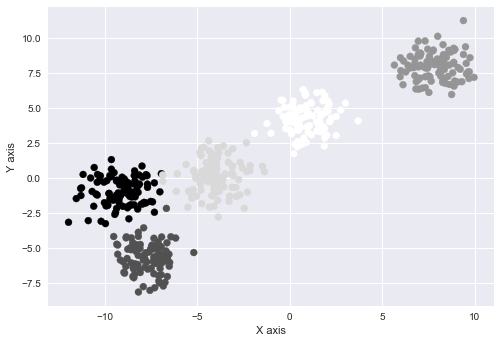

In [24]:
### Data visulization
import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c = Y)
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

In [31]:
### Define the random center
import numpy as np

k = 5
color = ["red","blue","green","black","yellow"]

clusters = {}
for i in range(k):
    points = [] ## Add the points of the cluster
    center = 10*(2*np.random.random((X.shape[1],))-1)
    
    cluster = {
        "center" : center,
        "points" : points,
        "color" : color[i]
    }
    
    clusters[i] = cluster
print("The initial state \n\n")
for i in range(k):
    print("For the cluster {} the center and points are {},{}".format(i,clusters[i]["center"],clusters[i]["points"]))

The initial state 


For the cluster 0 the center and points are [ 2.28952084 -5.36469155],[]
For the cluster 1 the center and points are [ 1.53817883 -8.29005171],[]
For the cluster 2 the center and points are [-0.85585221  4.92983737],[]
For the cluster 3 the center and points are [7.31235141 6.97847177],[]
For the cluster 4 the center and points are [-6.14877594  5.50510555],[]


In [32]:
### K means two steps

def distance(x1,x2):
    """Function returns the distance of the point"""
    return np.sqrt(np.sum((x1-x2)**2))

def m_Step(clusters,x,no_of_clusters):
    """Function assign points to the clusters"""
    for ix in range(x.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(no_of_clusters):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)    
        clusters[current_cluster]['points'].append(curr_x)
    
def e_Step(clusters,x,no_of_clusters):
    """Calculate new clusters"""
    for kx in range(no_of_clusters):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: #If a cluster has some-nonzero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []
            
def plotClusters(clusters,no_of_clusters,x,y):
    """Plot the points"""
    
    plt.style.use("seaborn")
    plt.scatter(x[:,0],x[:,1],c=y)
    for i in range(no_of_clusters):
        plt.scatter(clusters[i]['center'][0],clusters[i]['center'][1],c = "red")
    plt.show()

def kmeans():
    m_Step(clusters,X,k)
    e_Step(clusters,X,k)
    plotClusters(clusters,k,X,Y)

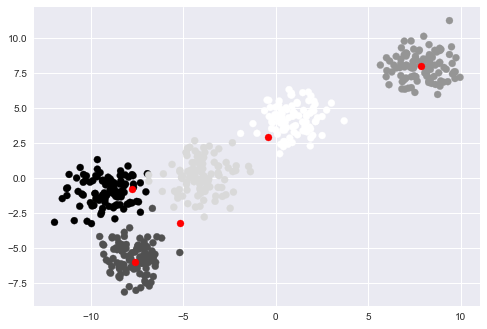

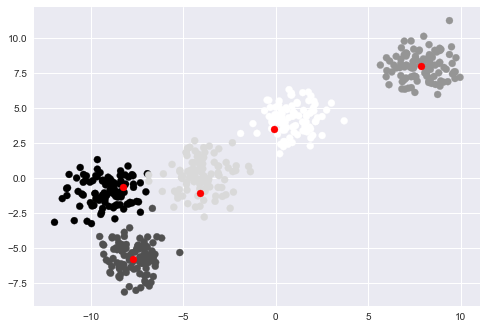

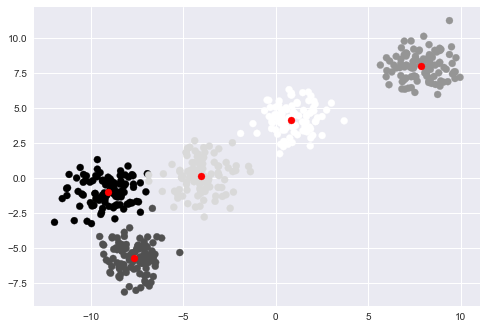

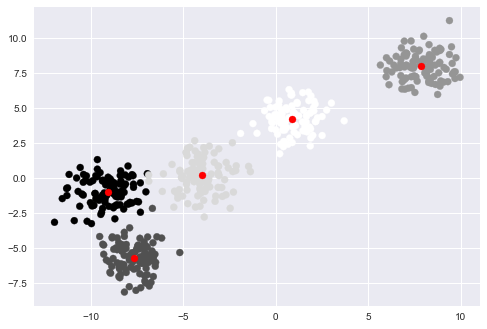

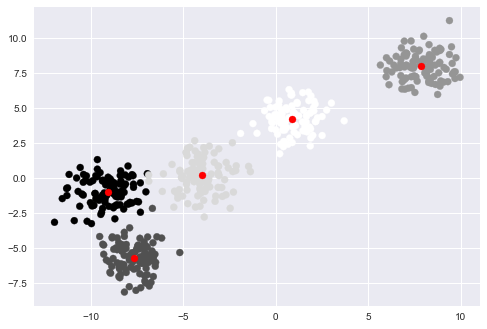

In [33]:
### Running for the 5 times
for i in range(5):
    kmeans()

In [42]:
### Using sklearn
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

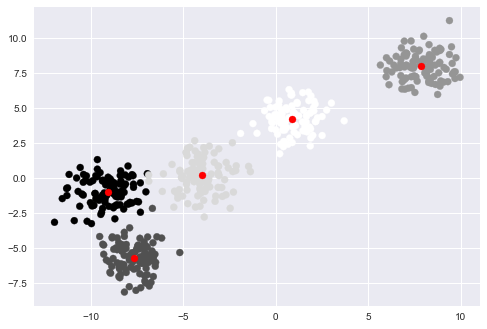

In [47]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y)
for i in range(5):
    plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = "red")
plt.show()